In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r'C:\Users\USER\Desktop\Modcode\ML_Live-_Class\data\advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [104]:
x = df.drop(['Sales'], axis=1)
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [44]:
y = df['Sales']
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size=0.33, random_state=101)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_train, y_train)

LinearRegression()

In [57]:
test_pred = model.predict(X_test)
test_pred

array([13.84736062, 21.6208545 , 12.4506434 , 15.53800991,  9.13572388,
        7.32848067, 22.13382615, 18.99389515, 12.5074889 , 20.10480143,
       11.14471789, 16.00799576, 17.13131444, 20.51391413, 18.52689489,
        9.81871779, 19.29995509, 10.02472134,  8.55196221, 21.07099084,
        7.84483773, 18.13469703, 24.90087497, 23.23638138,  9.50153866,
       15.6580894 , 23.83636942,  8.88965111, 14.71191831, 10.08773315,
        9.28121309, 20.03204425, 12.50942245,  6.7209499 , 17.73745681,
        9.90528961, 10.54065531, 10.3248605 ,  9.01341274, 13.48442892,
       11.40463282, 12.32027425, 11.24446527,  7.66448064, 11.63858892,
       10.59311539,  8.22759878, 18.42554295, 15.2491901 , 20.20019412,
       11.07711531, 16.71290321, 20.96270351, 12.69856152, 15.72864026,
        6.15801816, 24.13296025, 11.37314587, 21.46171542, 16.49013139,
       16.70390396, 24.54896417,  9.00346399, 19.27803416, 16.88593651,
       21.81240684])

In [58]:
from sklearn.metrics import mean_absolute_error

In [59]:
mean_absolute_error(y_test, test_pred)

1.421722777623365

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, test_pred)

3.082137309967573

In [61]:
np.sqrt(mean_squared_error(y_test, test_pred))

1.7556016945672992

In [63]:
test_residual = y_test - test_pred
test_residual.head()

37     0.852639
109   -1.820855
31    -0.550643
89     1.161990
66     1.864276
Name: Sales, dtype: float64

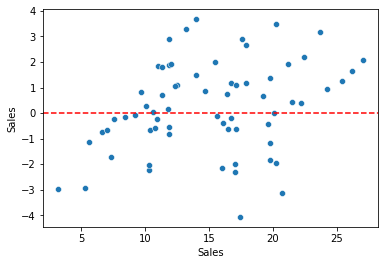

In [64]:
sns.scatterplot(x=y_test, y= test_residual) #residual plot
plt.axhline(y=0, color='red', ls='--')

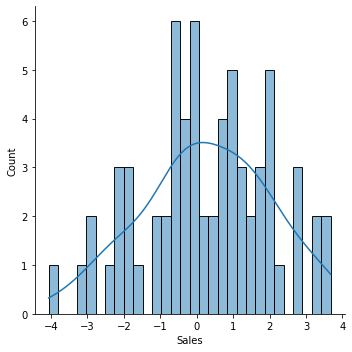

In [65]:
sns.displot(test_residual, bins=30, kde=True)

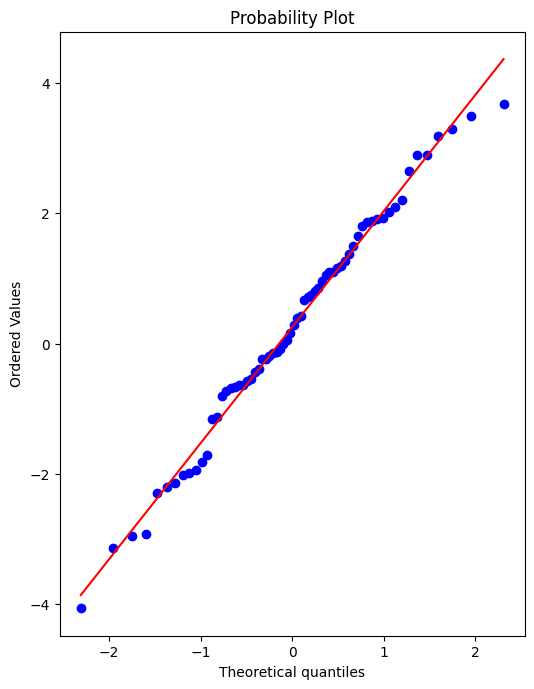

In [66]:
import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residual,plot=ax)

In [67]:
model.coef_

array([ 0.05475947,  0.11110453, -0.00941068])

In [68]:
y_hat = model.predict(x)

Text(0.5, 1.0, 'Newspaper Spend')

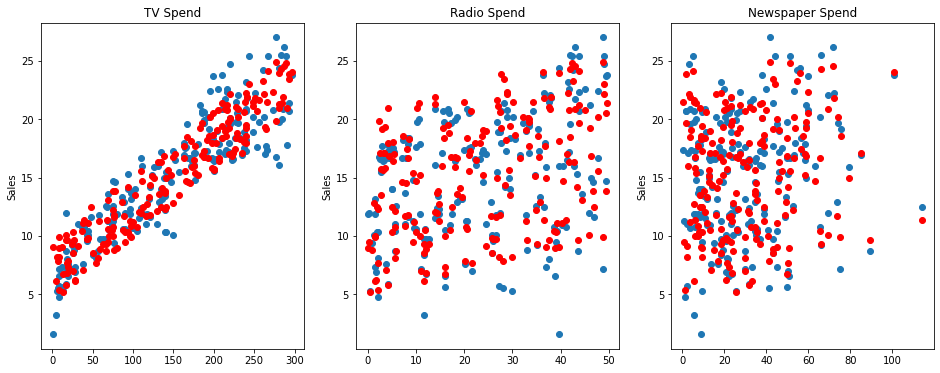

In [69]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")


axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].plot(df['Radio'], y_hat, 'o', color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].plot(df['Newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

In [70]:
from joblib import dump,load #saving your file as a binary file

In [73]:
import os

In [74]:
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)
filepath = os.path.join(model_dir, 'model.joblib')
dump(model, filepath)

['models\\model.joblib']

In [75]:
load_model = load(r'C:\Users\USER\Desktop\Modcode\ML_Live-_Class\models\model.joblib')

In [76]:
load_model.coef_

array([ 0.05475947,  0.11110453, -0.00941068])

In [79]:
example = [[151,25,25]]
load_model.predict(example)

c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([15.50935889])

In [ ]:
# POLYNOMIAL REGRESSION

In [81]:
x.shape

(200, 3)

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

In [84]:
poly_conv.fit(x)

PolynomialFeatures(include_bias=False)

In [85]:
poly_features = poly_conv.transform(x)

In [86]:
poly_features.shape

(200, 9)

In [88]:
x.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [90]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (poly_features, y, test_size=0.33, random_state=101)

In [93]:
model1 = LinearRegression()

In [94]:
model1.fit(X_train, y_train)

LinearRegression()

In [95]:
test_pred2 = model1.predict(X_test)
test_pred2

array([13.73729763, 21.18242466, 12.97653989, 16.27244745,  7.79428568,
        6.47813374, 21.55709584, 19.05558564, 13.62613421, 20.39877403,
        9.44075447, 16.42451527, 16.82940592, 22.24971165, 19.46358894,
        8.90282654, 17.73280571, 11.31308152,  8.64294876, 21.57608009,
        6.61232229, 19.00689629, 25.84046033, 23.74268557,  9.97077004,
       15.75920731, 22.61124976,  9.32982871, 15.23795646,  8.6682003 ,
        8.21736462, 20.36369594, 13.49526847,  6.14426598, 18.34430932,
       11.23087521, 11.09784264, 11.33375233,  7.03022331, 14.41881459,
       12.72794639, 13.40097257, 11.7977989 ,  6.79581202, 11.35779953,
       10.41309567,  5.79923857, 17.90408814, 15.63037075, 21.726204  ,
       10.06724947, 16.61367696, 18.91328201, 13.2336876 , 15.89845423,
        5.17495242, 24.8538122 ,  9.64582131, 20.51131932, 16.82761506,
       16.95408539, 24.61559276, 10.36701538, 20.73812635, 16.38802112,
       22.01089092])

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [99]:
MAE = mean_absolute_error(y_test, test_pred2)
MAE

1.1665197484834124

In [100]:
MSE = mean_squared_error(y_test, test_pred2)
MSE

2.205682874607847

In [101]:
np.sqrt(MSE)

1.4851541585329946

In [103]:
model1.coef_

array([ 7.70942584e-02, -2.35636076e-02, -4.29758910e-03, -1.07610956e-04,
        5.03238675e-04, -8.46542155e-05,  1.16071503e-03,  1.34058536e-04,
        1.28654587e-04])

In [105]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split (poly_features, y, test_size=0.33, random_state=101)
    model2 = LinearRegression()
    model2.fit(X_train, y_train)


    train_pred =model2.predict(X_train)
    test_pred = model2.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [106]:
train_rmse_errors

[1.6094199546576153,
 1.296432681300953,
 1.2343948527487951,
 1.0594929481767363,
 0.8891772577951299,
 0.9081226185188078,
 5.54485484416119,
 1.1752732993754025,
 0.2857125160659247]

In [107]:
test_rmse_errors  # overfitting is happening after the fifth degree (error is exploding)

[1.7556016945673003,
 1.4851541585329946,
 1.4877657821785526,
 1.669168265378844,
 2.1199374281109344,
 36.5732706266427,
 1938.877274715888,
 5534.667995020976,
 468982.9987687251]

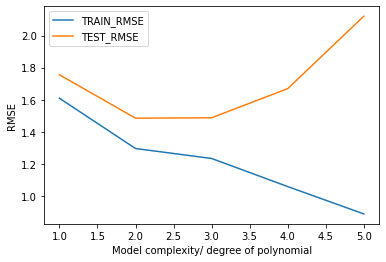

In [109]:
plt.plot(range(1,6), train_rmse_errors[:5], label ='TRAIN_RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label ='TEST_RMSE')
plt.xlabel("Model complexity/ degree of polynomial")
plt.ylabel("RMSE")
plt.legend()
# you choose the 2nd degree

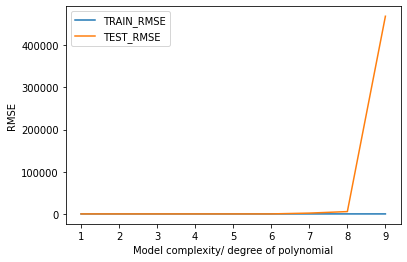

In [110]:
plt.plot(range(1,10), train_rmse_errors, label ='TRAIN_RMSE')
plt.plot(range(1,10), test_rmse_errors, label ='TEST_RMSE')
plt.xlabel("Model complexity/ degree of polynomial")
plt.ylabel("RMSE")
plt.legend()

In [111]:
finaly_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
final_model = LinearRegression()


In [112]:
full_converted_x = finaly_poly_converter.fit_transform(x)

In [114]:
final_model.fit(full_converted_x, y)

LinearRegression()

In [115]:
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)
filepath = os.path.join(model_dir, 'poly3.joblib')
dump(final_model, filepath)

['models\\poly3.joblib']